In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AirPollution.csv")

In [4]:
print(df.head())


  country  state      city                        station  \
0   India  Assam  Guwahati          IITG, Guwahati - PCBA   
1   India  Assam  Guwahati          IITG, Guwahati - PCBA   
2   India  Assam  Guwahati  LGBI Airport, Guwahati - PCBA   
3   India  Assam  Guwahati  LGBI Airport, Guwahati - PCBA   
4   India  Assam  Guwahati    Pan Bazaar, Guwahati - PCBA   

           last_update   latitude  longitude pollutant_id  pollutant_min  \
0  06-04-2025 14:00:00  26.202864  91.700464          NH3            5.0   
1  06-04-2025 14:00:00  26.202864  91.700464          SO2           19.0   
2  06-04-2025 14:00:00  26.108870  91.589544          NH3           15.0   
3  06-04-2025 14:00:00  26.108870  91.589544          SO2            7.0   
4  06-04-2025 14:00:00  26.187500  91.744194         PM10           47.0   

   pollutant_max  pollutant_avg  
0            5.0            5.0  
1           21.0           19.0  
2           49.0           18.0  
3           14.0           12.0  
4     

In [5]:
print(df.tail())

     country        state     city  \
3188   India  West_Bengal  Kolkata   
3189   India  West_Bengal  Kolkata   
3190   India  West_Bengal  Kolkata   
3191   India  West_Bengal  Kolkata   
3192   India  West_Bengal  Kolkata   

                                           station          last_update  \
3188                     Jadavpur, Kolkata - WBPCB  06-04-2025 14:00:00   
3189  Rabindra Bharati University, Kolkata - WBPCB  06-04-2025 14:00:00   
3190             Rabindra Sarobar, Kolkata - WBPCB  06-04-2025 14:00:00   
3191                     Victoria, Kolkata - WBPCB  06-04-2025 14:00:00   
3192                     Victoria, Kolkata - WBPCB  06-04-2025 14:00:00   

       latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
3188  22.499290  88.369170        OZONE           15.0          115.0   
3189  22.627847  88.380669          SO2            9.0           13.0   
3190  22.511060  88.351420        OZONE           21.0          165.0   
3191  22.544808  88.340369  

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3193 non-null   object 
 1   state          3193 non-null   object 
 2   city           3193 non-null   object 
 3   station        3193 non-null   object 
 4   last_update    3193 non-null   object 
 5   latitude       3193 non-null   float64
 6   longitude      3193 non-null   float64
 7   pollutant_id   3193 non-null   object 
 8   pollutant_min  3193 non-null   float64
 9   pollutant_max  3193 non-null   float64
 10  pollutant_avg  3193 non-null   float64
dtypes: float64(5), object(6)
memory usage: 274.5+ KB
None


In [7]:
print(df.describe())

          latitude    longitude  pollutant_min  pollutant_max  pollutant_avg
count  3193.000000  3193.000000    3193.000000    3193.000000    3193.000000
mean     22.240313    78.829966      23.428571      87.670380      48.316514
std       5.547880     4.996175      25.197711      90.446453      48.629282
min       8.514909    70.909168       1.000000       1.000000       1.000000
25%      19.000083    75.565602       5.000000      22.000000      13.000000
50%      23.076793    77.508730      15.000000      64.000000      35.000000
75%      26.766433    80.948222      32.000000     114.000000      63.000000
max      34.066206    94.636574     240.000000     500.000000     399.000000


In [8]:
print(df.isnull().sum())

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64


In [9]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())


In [10]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
print(df.isnull().sum())

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64


In [12]:
df.to_csv("cleanedAir.csv", index=False)

In [13]:
print("Columns:", df.columns)

Columns: Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg'],
      dtype='object')


In [14]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

country: 1 unique values
state: 32 unique values
city: 254 unique values
station: 481 unique values
last_update: 1 unique values
latitude: 481 unique values
longitude: 481 unique values
pollutant_id: 7 unique values
pollutant_min: 132 unique values
pollutant_max: 379 unique values
pollutant_avg: 232 unique values


<Figure size 1000x800 with 0 Axes>

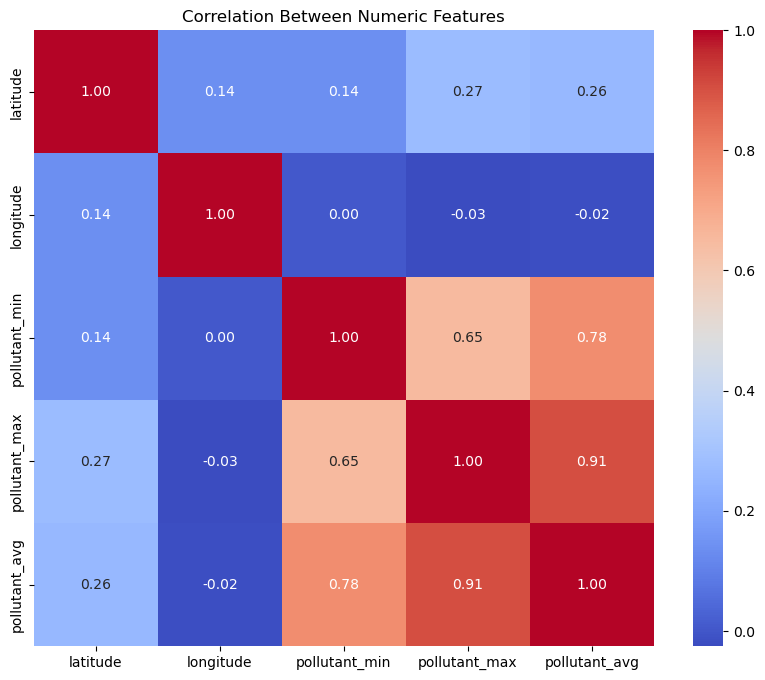

In [15]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

In [32]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg'],
      dtype='object')

In [34]:
X = df.drop(
    ['country', 'state', 'city', 'station', 'last_update', 'latitude',
     'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max'],
    axis=1
)
y = df['pollutant_avg']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MAE: 1.55146283578917e-14
MSE: 5.084159153185088e-28
R^2: 1.0


In [41]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MAE: 1.55146283578917e-14
MSE: 5.084159153185088e-28
R^2: 1.0


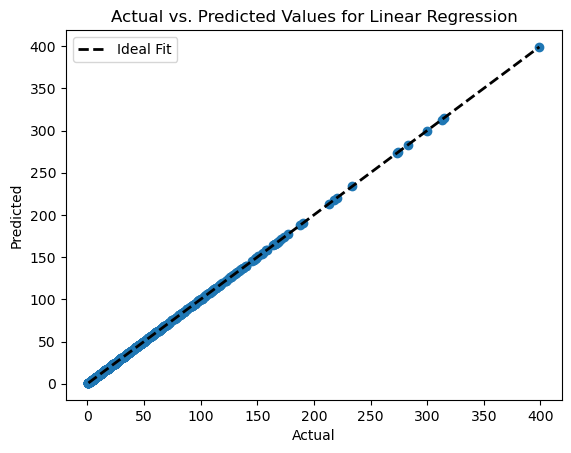

In [44]:
import matplotlib.pyplot as plt

# y_test: the true values
# y_pred: the predicted values from your model
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.legend()
plt.show()